# Find the error


1. Run the following code:

Discriminant analysis
0.303
Logistic Regression
0.149
Nearest Neighbour
0.0
Support Vector Machine
0.142


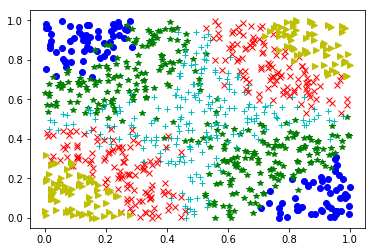

In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

data = np.genfromtxt('myData.txt', delimiter=';')
features = data[:,0:2]
labels = data[:,-1]

K = np.unique(labels).size

plt.clf() 
lineStyle= ['ob', '*g', '+c', 'xr', '>y']
for cls in range(K):
    idx = (labels == cls+1)
    plt.plot(features[np.nonzero(idx)[0],0], features[np.nonzero(idx)[0],1], lineStyle[cls])
    
print('Discriminant analysis')
model = QuadraticDiscriminantAnalysis()
model = model.fit(features, labels)
y_pred = model.predict(features)
aux = (y_pred!=labels)
aux = np.sum(aux.astype(float))
misclassificationRate = aux/labels.size
print (misclassificationRate)

print('Logistic Regression')
model = LogisticRegression(multi_class = 'multinomial', solver='newton-cg', C=100)
#create extended features
xfeatures = np.concatenate((features, features[:,0:1]*features[:,1:2]), 1)
y_pred = model.fit(xfeatures, labels).predict(xfeatures)
aux = (y_pred!=labels)
aux = np.sum(aux.astype(float))
misclassificationRate = aux/labels.size
print (misclassificationRate)

print('Nearest Neighbour')
model = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
model.fit(features, labels)
y_pred = model.predict(features)
aux = (y_pred!=labels)
aux = np.sum(aux.astype(float))
misclassificationRate = aux/labels.size
print (misclassificationRate)

print('Support Vector Machine')
model = SVC(kernel = 'poly', degree=2, coef0=1.0, C=100)
y_pred = model.fit(features, labels).predict(features)
aux = (y_pred!=labels)
aux = np.sum(aux.astype(float))
misclassificationRate = aux/labels.size
print (misclassificationRate)

2. Compare the estimated performance for the Gaussian Classifier, logistic regression, nearest neighbor and SVM. What metric is being used? Which seems to be the best model?

3. Exercise: For the nearest neighbor, change the size of the neighborhood to 5. What’s the estimated performance now?

4. What is the problem with the previous methodology? Change the code to have a fair estimation of the performance of each classifier.

5. Change the code to find the best parameterization of each classifier and an estimation of the performance for the best parameterization.

6. Repeat 4 making use of the train_test_split and KFold functions in sklearn.

7: Repeat 5 making use of the GridSearchCV.